# Non-Personalized Recommender Assignment

In this assignment, you will implement some non-personalized recommenders.  In particular, you will
implement raw and damped item mean recommenders and simple and advanced association rule
recommenders.

You will implement these recommenders in the LensKit toolkit.

## Downloads and Resources

-   Project template (from Coursera)
-   [LensKit for Teaching website](http://mooc.lenskit.org) (links to relevant documentation)
-   [JavaDoc for included code](http://mooc.lenskit.org/assignments/nonpers/javadoc/)
-   [Fastutil API docs](http://fastutil.di.unimi.it/docs/) documents the Fastutil optimized data
    structure classes that are used in portions of LensKit.

The project template contains support code, the build file, and the input data that you will use.

## Input Data

The input data contains the following files:

- `ratings.csv` contains user ratings of movies
- `movies.csv` contains movie titles
- `movielens.yml` is a LensKit data manifest that describes the other input files



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/media/neeraj/Programs/ALinstall/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Description
ratings:
  - entity_type: rating
  
movies:
  - entity_type: ```item```
  - columns: ```[id, name]```
  
tags:
 - entity_type: item-tag
 - columns:
  
  - name: ```item```  
    type: ```long```
    
  - name: ```user```  
    type: ```long```
    
  - name: ```tag```  
    type: ```string```
    
  - name: ```timestamp```  
    type: ```long```

In [2]:
movies   = pd.read_csv("data/movies.csv",encoding = "ISO-8859-1")
ratings  = pd.read_csv("data/ratings.csv")
tags     = pd.read_csv("data/tags.csv",encoding = "ISO-8859-1")

In [3]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [4]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [5]:
tags.columns

Index(['movieId', 'userId', 'tag', 'timestamp'], dtype='object')

In [6]:
df = ratings
ratings = ratings[["movieId","rating"]]

### Recommending Items

Compute recommendations based on item mean
ratings.  For this, you need to:

1.  Obtain the mean rating for each item
2.  Order the items in decreasing order
3.  Return the *N* highest-rated items



In [22]:
meanratings = ratings.groupby("movieId", sort= True).mean()#.sort_values(by="rating",ascending=0).loc[2959]

In [27]:
top5  = meanratings.sort_values(by="rating", ascending = False).head()

In [28]:
top5

,rating
movieId,
318,4.364362
858,4.315848
1248,4.259259
2959,4.258503
7502,4.247423


In [84]:
top5.index

Int64Index([318, 858, 1248, 2959, 7502], dtype='int64', name='movieId')

In [83]:
movies.loc[[318,858]]

,movieId,title,genres
318,548,Terminal Velocity (1994),Action|Mystery|Thriller
858,1754,Fallen (1998),Crime|Drama|Fantasy|Thriller


In [138]:
a = [movies.movieId == i for i in top5.index]

In [156]:
movies[sum(a)==1]

,movieId,title,genres
189,318,"Shawshank Redemption, The (1994)",Crime|Drama
422,858,"Godfather, The (1972)",Crime|Drama
632,1248,Touch of Evil (1958),Crime|Film-Noir|Thriller
1355,2959,Fight Club (1999),Action|Crime|Drama|Thriller
2110,7502,Band of Brothers (2001),Action|Drama|War


In [143]:
labels = movies[sum(a)==1].title.values

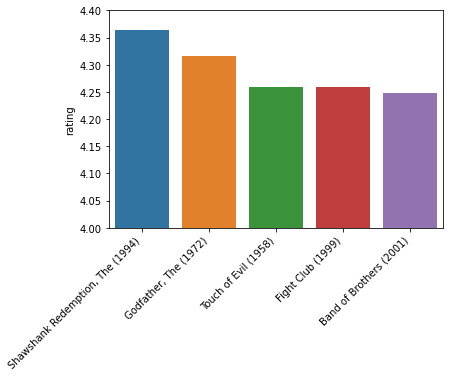

In [159]:
ax =sns.barplot(x = labels, y= top5.rating)
plt.ylim(4,4.4)
# plt.xlabel(xlabel = labels)
plt.xticks(rotation = 45, ha ="right")
plt.show()

### Computing Damped Item Means

Modify the `DampedItemMeanModelProvider` class to compute the damped mean rating for each item.
This formula uses a damping factor $\alpha$, which is the number of 'fake' ratings at the global
mean to assume for each item.  In the Java code, this is available as the field `damping`.

The damped mean formula, as you may recall, is:

$$s(i) = \frac{\sum_{u \in U_i} r_{ui} + \alpha\mu}{|U_i| + \alpha}$$

where $\mu$ is the *global* mean rating.

In [10]:
def search(x,ratings,mean):
    α = 5
    sumr = 0
    for i in x:
        sumr=sumr+ratings.rating[ratings.rating == i].mean()
        
    dampedmean = (sumr + α*mean)/(len(x)+α)
    return dampedmean

mean = ratings.rating.mean()
dampedrats = ratings.groupby("movieId").agg(lambda x : search(x,ratings,mean))



### Example Outputs

To help you see if your output is correct, we have provided the following example correct values:

| ID  | Title | Mean | Damped Mean |
| :-: | :---- | :--: | :---------: |
| 2959 | *Fight Club* | 4.259 | 4.252 |
| 1203 | *12 Angry Men* | 4.246 | 4.227 |


In [17]:
print(f"Mean Rating        : {round(meanratings.loc[2959][0],3)} | Expected : 4.259 " +
      f"\nDamped Mean Rating : {round(dampedrats.loc[2959][0],3)} | Expected : 4.252 ")

Mean Rating        : 4.259 | Expected : 4.259 
Damped Mean Rating : 4.252 | Expected : 4.252 


In [18]:
print(f"Mean Rating        : {round(meanratings.loc[1203][0],3)} | Expected : 4.246 " +
      f"\nDamped Mean Rating : {round(dampedrats.loc[1203][0],3)} | Expected : 4.227 ")

Mean Rating        : 4.246 | Expected : 4.246 
Damped Mean Rating : 4.227 | Expected : 4.227 
